In [13]:
import pandas as pd 
import numpy as np 
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
import hangul_font
import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns

from sklearn.cluster import KMeans

In [14]:
data=pd.read_excel("total_seo.xlsx")
data

,Unnamed: 0,labels,행정동,시군구,응급실_60,주거면적_60미만,2019노인자살,2020노인학대건수,경로당,65세이상장애인수,수급권자수,65세이상인구수,독거노인,복지계열종사자수
0,0,1,중화2동,중랑구,5.948871,2.514954,4.539474,5.573077,3.926154,0.401372,0.394904,0.595316,0.643237,0.000000
1,1,1,신내1동,중랑구,5.948871,2.514954,4.539474,5.573077,3.926154,0.563237,0.617834,0.800918,0.483449,0.048780
2,2,1,면목본동,중랑구,5.948871,2.514954,4.539474,5.573077,3.926154,0.463374,0.456476,0.717614,0.705353,0.000000
3,3,1,망우본동,중랑구,5.948871,2.514954,4.539474,5.573077,3.926154,0.486968,0.456476,0.720150,0.688598,0.000000
4,4,1,종암동,성북구,5.694214,3.106311,6.900000,2.521154,2.301538,0.474897,0.354565,0.792346,0.650184,0.300813
5,5,1,석관동,성북구,5.694214,3.106311,6.900000,2.521154,2.301538,0.517695,0.352442,0.841845,0.690233,0.032520
6,6,1,번2동,강북구,4.652058,2.448019,3.268421,3.715385,4.840000,0.396708,0.666667,0.472413,0.466694,0.000000
7,7,1,번3동,강북구,4.652058,2.448019,3.268421,3.715385,4.840000,0.620576,1.000000,0.554871,0.542297,0.000000
8,8,1,삼양동,강북구,4.652058,2.448019,3.268421,3.715385,4.840000,0.377503,0.424628,0.579983,0.583163,0.000000
9,9,1,송중동,강북구,4.652058,2.448019,3.268421,3.715385,4.840000,0.415912,0.473461,0.707956,0.593380,0.000000


In [15]:
data["시군구"].value_counts()

노원구    7
강북구    6
은평구    6
강서구    6
관악구    5
강동구    5
중랑구    4
도봉구    3
성북구    2
강남구    1
Name: 시군구, dtype: int64

In [16]:
data.columns

Index(['Unnamed: 0', 'labels', '행정동', '시군구', '응급실_60', '주거면적_60미만', '2019노인자살',
       '2020노인학대건수', '경로당', '65세이상장애인수', '수급권자수', '65세이상인구수', '독거노인',
       '복지계열종사자수'],
      dtype='object')

In [17]:
from sklearn.preprocessing import StandardScaler

std_df = StandardScaler().fit_transform(data[['65세이상장애인수', '수급권자수', '65세이상인구수', '독거노인',
       '복지계열종사자수']]) 
std_df = pd.DataFrame(std_df, index=data.index, columns=data[['65세이상장애인수', '수급권자수', '65세이상인구수', '독거노인',
       '복지계열종사자수']].columns)
std_df.head()

,65세이상장애인수,수급권자수,65세이상인구수,독거노인,복지계열종사자수
0,-0.884878,-0.584121,-0.976401,0.030933,-0.415112
1,0.445596,0.808398,0.673758,-1.309617,0.260070
2,-0.375239,-0.199521,0.005168,0.552067,-0.415112
3,-0.181305,-0.199521,0.025516,0.411498,-0.415112
4,-0.280527,-0.836101,0.604961,0.089218,3.748508


In [18]:
from sklearn.decomposition import PCA

nc = 3

pca = PCA(n_components=nc)
pca_array = pca.fit_transform(std_df)
pca_df = pd.DataFrame(pca_array, index=std_df.index,
                      columns=[f"pca{num+1}" for num in range(nc)])
pca_df

sum(pca.explained_variance_ratio_)

,pca1,pca2,pca3
0,-1.177264,0.029739,0.199075
1,0.127490,0.347474,0.108181
2,-0.129513,-0.163486,-0.396511
3,-0.089939,-0.108450,-0.416259
4,1.285825,-2.226383,2.897333
5,0.376825,-1.193258,-0.571158
6,-1.829361,1.905479,1.020083
7,0.457214,3.438881,0.443077
8,-1.551065,0.222651,0.384927
9,-0.861888,-0.064703,-0.132409


0.858996071236263

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,2.350054,0.459566,0.459566
pca2,1.318716,0.257882,0.717448
pca3,0.723824,0.141548,0.858996


<AxesSubplot:>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Scree plot')

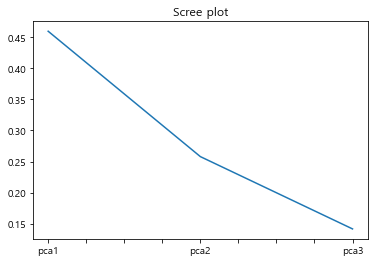

In [19]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(nc)]))
result['누적기여율'] = result['기여율'].cumsum()
result

result['기여율'].plot.line()
plt.title('Scree plot')

<AxesSubplot:>

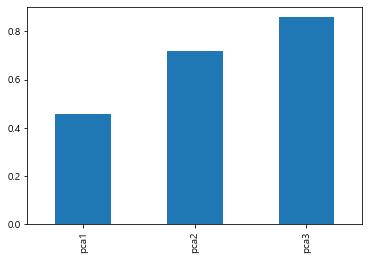

In [20]:
result['누적기여율'].plot.bar()

In [21]:
from sklearn.cluster import KMeans

In [22]:
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.figure(1 , figsize = (12, 6))
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.grid()
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

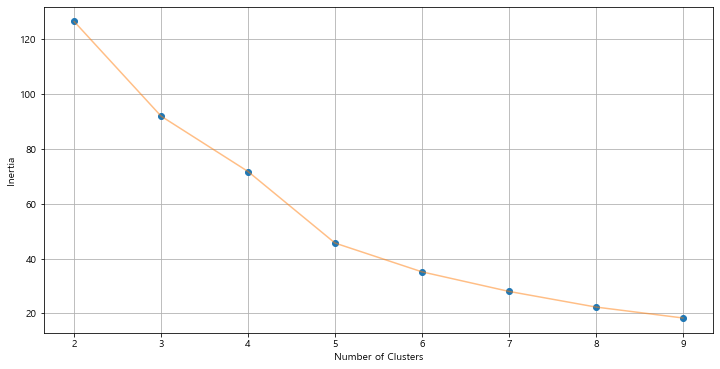

In [23]:
change_n_clusters(range(2,10), pca_df)

In [24]:
n=5
kmeans = KMeans(n_clusters=n)
labels = kmeans.fit_predict(pca_df.iloc[:,:3])

<IPython.core.display.Javascript object>

Text(0.5, 0.92, 'Kmeans:5')

Text(0.5, 0, 'pca1')

Text(0.5, 0, 'pca2')

Text(0.5, 0, 'pca3')

Silhouette Score: 0.4267438963143571


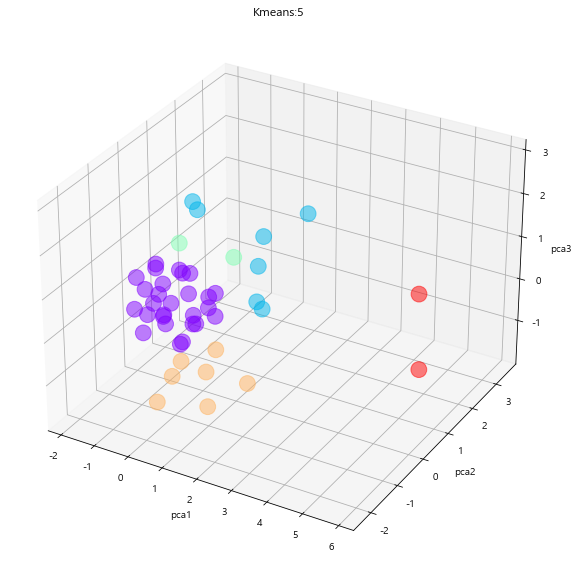

In [31]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') 

x = pca_df.iloc[:,0]
y = pca_df.iloc[:,1]
z = pca_df.iloc[:,2]
ax.scatter(x, y, z, c = labels, s= 250, alpha=0.5, cmap='rainbow')
ax.set_title('Kmeans:'+str(n))
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')

print("Silhouette Score:", silhouette_score(pca_df.iloc[:,:3], kmeans.labels_))

In [26]:
data["labels"]=labels
data

,Unnamed: 0,labels,행정동,시군구,응급실_60,주거면적_60미만,2019노인자살,2020노인학대건수,경로당,65세이상장애인수,수급권자수,65세이상인구수,독거노인,복지계열종사자수
0,0,0,중화2동,중랑구,5.948871,2.514954,4.539474,5.573077,3.926154,0.401372,0.394904,0.595316,0.643237,0.000000
1,1,0,신내1동,중랑구,5.948871,2.514954,4.539474,5.573077,3.926154,0.563237,0.617834,0.800918,0.483449,0.048780
2,2,0,면목본동,중랑구,5.948871,2.514954,4.539474,5.573077,3.926154,0.463374,0.456476,0.717614,0.705353,0.000000
3,3,0,망우본동,중랑구,5.948871,2.514954,4.539474,5.573077,3.926154,0.486968,0.456476,0.720150,0.688598,0.000000
4,4,2,종암동,성북구,5.694214,3.106311,6.900000,2.521154,2.301538,0.474897,0.354565,0.792346,0.650184,0.300813
5,5,3,석관동,성북구,5.694214,3.106311,6.900000,2.521154,2.301538,0.517695,0.352442,0.841845,0.690233,0.032520
6,6,1,번2동,강북구,4.652058,2.448019,3.268421,3.715385,4.840000,0.396708,0.666667,0.472413,0.466694,0.000000
7,7,1,번3동,강북구,4.652058,2.448019,3.268421,3.715385,4.840000,0.620576,1.000000,0.554871,0.542297,0.000000
8,8,0,삼양동,강북구,4.652058,2.448019,3.268421,3.715385,4.840000,0.377503,0.424628,0.579983,0.583163,0.000000
9,9,0,송중동,강북구,4.652058,2.448019,3.268421,3.715385,4.840000,0.415912,0.473461,0.707956,0.593380,0.000000


In [32]:
pd.pivot_table(data=data[['65세이상장애인수', '수급권자수', '65세이상인구수', '독거노인',
       '복지계열종사자수',"labels"]],index = 'labels',aggfunc='mean').to_excel("piv_dong.xlsx")

In [34]:
pd.pivot_table(data=data[['65세이상장애인수', '수급권자수', '65세이상인구수', '독거노인',
       '복지계열종사자수',"labels"]],index = 'labels',aggfunc='mean')

,65세이상인구수,65세이상장애인수,독거노인,복지계열종사자수,수급권자수
labels,,,,,
0,0.695525,0.455429,0.596967,0.010238,0.435244
1,0.558804,0.551832,0.612061,0.000000,0.697604
2,0.814560,0.494787,0.692072,0.292683,0.442675
3,0.896380,0.549598,0.719073,0.032520,0.391871
4,0.834541,0.955007,0.979771,0.130081,0.857749


In [45]:
print(list(data["행정동"][data['labels']==0]))

['중화2동', '신내1동', '면목본동', '망우본동', '삼양동', '송중동', '송천동', '방학1동', '도봉1동', '도봉2동', '월계3동', '상계1동', '상계5동', '구산동', '불광2동', '응암3동', '방화1동', '방화3동', '은천동', '성현동', '난곡동', '삼성동', '미성동', '강일동', '천호1동', '암사1동', '천호2동']


In [46]:
data["시군구"][data['labels']==0].value_counts().index
data["시군구"][data['labels']==0].value_counts()

Index(['관악구', '중랑구', '강동구', '강북구', '도봉구', '노원구', '은평구', '강서구'], dtype='object')

관악구    5
중랑구    4
강동구    4
강북구    3
도봉구    3
노원구    3
은평구    3
강서구    2
Name: 시군구, dtype: int64

In [28]:
data.to_excel('seo_dong.xlsx')

In [33]:
data['labels'].value_counts()

0    27
3     7
1     7
2     2
4     2
Name: labels, dtype: int64